# Geodesic Simulations Around Black Holes
## From Schwarzschild to Kerr: A Journey Through Curved Spacetime

This notebook demonstrates photon and massive particle trajectories around both non-rotating (Schwarzschild) and rotating (Kerr) black holes using numerical integration of the geodesic equations.

**Author:** Fynn Hufler
**Date:** December 2nd, 2025

---

### Table of Contents
1. [Setup and Imports](#setup)
2. [Schwarzschild Black Holes (Brief Review)](#schwarzschild)
3. [Kerr Black Holes: Theory](#kerr-theory)
4. [Kerr Black Holes: Simulations](#kerr-sims)
5. [Comparative Analysis](#comparison)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle
from matplotlib.collections import LineCollection
import os
from IPython.display import HTML, Video, display
import warnings
import sys

sys.path.append('../src')

warnings.filterwarnings('ignore')

# Import geodesic simulator
from geodesics import (
    SchwarzschildMetric, 
    KerrMetric,
    GeodesicSimulation,
    Trajectory
)

# Create output directories
os.makedirs('../results/plots', exist_ok=True)
os.makedirs('../results/videos', exist_ok=True)

# Configure matplotlib
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 11

# Configure animation settings
plt.rcParams["animation.writer"] = "ffmpeg"
plt.rcParams["animation.bitrate"] = 1200

print(f" Geometric units: G = c = 1")

 Geometric units: G = c = 1


---
## 1. Schwarzschild Black Holes: Quick Review <a id="schwarzschild"></a>

The **Schwarzschild metric** describes a non-rotating, spherically symmetric black hole. It's the simplest exact solution to Einstein's field equations.

### Metric (in Boyer-Lindquist coordinates)

$$ds^2 = -f(r)dt^2 + \frac{1}{f(r)}dr^2 + r^2(d\theta^2 + \sin^2\theta \, d\phi^2)$$

where $f(r) = 1 - \frac{2M}{r}$ and $M$ is the black hole mass.

### Key Features

- **Event Horizon:** $r_s = 2M$ — the point of no return
- **Photon Sphere:** $r_{ph} = 3M$ — unstable circular orbits for light
- **ISCO (massive particles):** $r_{ISCO} = 6M$ — innermost stable circular orbit

### Geodesic Equations

Particles follow geodesics satisfying:
$$\frac{d^2x^\mu}{d\tau^2} + \Gamma^\mu_{\alpha\beta}\frac{dx^\alpha}{d\tau}\frac{dx^\beta}{d\tau} = 0$$

where $\Gamma^\mu_{\alpha\beta}$ are the Christoffel symbols and $\tau$ is the affine parameter.

### Quick Schwarzschild Demonstration

In [2]:
# Initialize Schwarzschild metric
M = 1.0
metric_sch = SchwarzschildMetric(mass=M)
sim_sch = GeodesicSimulation(metric_sch)

print("Schwarzschild Black Hole Parameters:")
print(f"  Mass M = {M}")
print(f"  Schwarzschild radius r_s = {metric_sch.r_s:.2f} M")
print(f"  Photon sphere r_ph = {metric_sch.r_photon:.2f} M")
print(f"  ISCO (timelike) r_ISCO = {metric_sch.r_isco:.2f} M")

# Simulate photon trajectories
print("\nSimulating photon trajectories...")
r0_values = np.linspace(3.5, 15, 8)
trajectories_photon = sim_sch.simulate_bundle(
    r0_values, 
    impact_param=5.5,  # Impact parameter b = L/E
    is_timelike=False,
    tau_span=(0, 200)
)

# Simulate massive particle trajectories
print("\nSimulating massive particle trajectories...")
sim_sch.clear()
trajectories_massive = sim_sch.simulate_bundle(
    r0_values, 
    impact_param=7.0,  # Larger impact parameter for massive particles
    is_timelike=True,
    tau_span=(0, 200)
)

Schwarzschild Black Hole Parameters:
  Mass M = 1.0
  Schwarzschild radius r_s = 2.00 M
  Photon sphere r_ph = 3.00 M
  ISCO (timelike) r_ISCO = 6.00 M

Simulating photon trajectories...
Simulated: r₀=3.50, points: 32
Simulated: r₀=5.14, points: 42
Simulated: r₀=6.79, points: 55
Simulated: r₀=8.43, points: 68
Simulated: r₀=10.07, points: 82
Simulated: r₀=11.71, points: 97
Simulated: r₀=13.36, points: 112
Simulated: r₀=15.00, points: 127

Simulating massive particle trajectories...
Simulated: r₀=3.50, points: 29
Simulated: r₀=5.14, points: 52
Simulated: r₀=6.79, points: 81
Simulated: r₀=8.43, points: 116
Simulated: r₀=10.07, points: 157
Simulated: r₀=11.71, points: 204
Simulated: r₀=13.36, points: 256
Simulated: r₀=15.00, points: 314


FileNotFoundError: [Errno 2] No such file or directory: 'results/plots/schwarzschild_comparison.png'

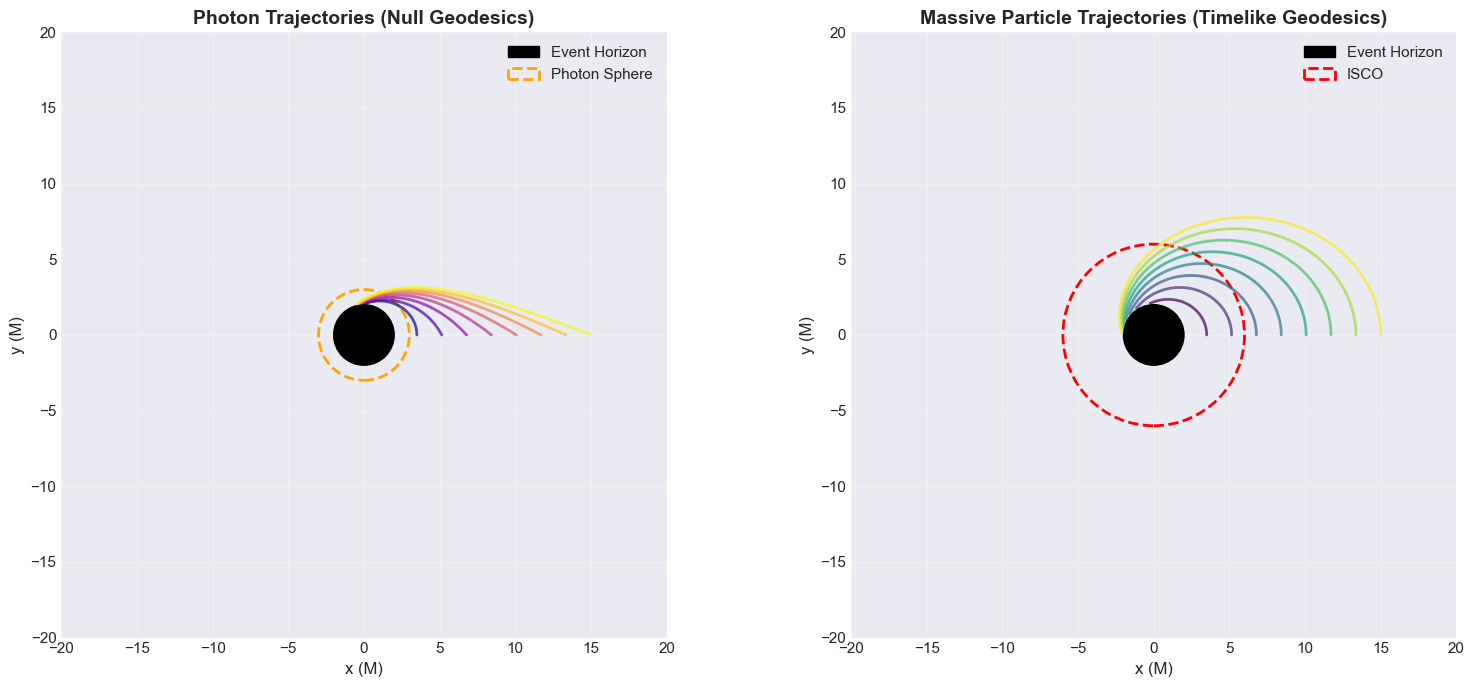

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Plot photons
colors = plt.cm.plasma(np.linspace(0, 1, len(trajectories_photon)))
for i, traj in enumerate(trajectories_photon):
    ax1.plot(traj.x, traj.y, alpha=0.7, linewidth=2, color=colors[i])

horizon1 = Circle((0, 0), metric_sch.r_s, color='black', label='Event Horizon')
ax1.add_patch(horizon1)
photon_sphere1 = Circle((0, 0), metric_sch.r_photon, fill=False, 
                        color='orange', linestyle='--', linewidth=2, 
                        label='Photon Sphere')
ax1.add_patch(photon_sphere1)

ax1.set_xlim(-20, 20)
ax1.set_ylim(-20, 20)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x (M)', fontsize=12)
ax1.set_ylabel('y (M)', fontsize=12)
ax1.set_title('Photon Trajectories (Null Geodesics)', fontsize=14, fontweight='bold')
ax1.legend(loc='upper right')

# Plot massive particles
colors = plt.cm.viridis(np.linspace(0, 1, len(trajectories_massive)))
for i, traj in enumerate(trajectories_massive):
    ax2.plot(traj.x, traj.y, alpha=0.7, linewidth=2, color=colors[i])

horizon2 = Circle((0, 0), metric_sch.r_s, color='black', label='Event Horizon')
ax2.add_patch(horizon2)
isco = Circle((0, 0), metric_sch.r_isco, fill=False, 
              color='red', linestyle='--', linewidth=2, label='ISCO')
ax2.add_patch(isco)

ax2.set_xlim(-20, 20)
ax2.set_ylim(-20, 20)
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('x (M)', fontsize=12)
ax2.set_ylabel('y (M)', fontsize=12)
ax2.set_title('Massive Particle Trajectories (Timelike Geodesics)', 
              fontsize=14, fontweight='bold')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.savefig('../results/plots/schwarzschild_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

---
## 2. Kerr Black Holes: Theory <a id="kerr-theory"></a>

The **Kerr metric** describes a rotating black hole — the most general stationary black hole solution in vacuum. Discovered by Roy Kerr in 1963, it's one of the most important solutions in general relativity.

### The Kerr Metric

In Boyer-Lindquist coordinates $(t, r, \theta, \phi)$, the Kerr metric is:

$$ds^2 = -\left(1 - \frac{2Mr}{\Sigma}\right)dt^2 - \frac{4Mar\sin^2\theta}{\Sigma}dtd\phi + \frac{\Sigma}{\Delta}dr^2 + \Sigma d\theta^2 + \frac{A\sin^2\theta}{\Sigma}d\phi^2$$

where:
- $\Sigma = r^2 + a^2\cos^2\theta$
- $\Delta = r^2 - 2Mr + a^2$
- $A = (r^2 + a^2)^2 - a^2\Delta\sin^2\theta$
- $a = J/M$ is the **spin parameter** (angular momentum per unit mass)
- $0 \leq a \leq M$ for physical black holes

### Key Parameters

**Spin Parameter** $a$:
- $a = 0$: Schwarzschild black hole (non-rotating)
- $0 < a < M$: Kerr black hole (rotating)
- $a = M$: **Extremal Kerr** (maximally rotating)
- $a > M$: Naked singularity (forbidden by cosmic censorship)

### Event Horizons

Unlike Schwarzschild, Kerr black holes have **two horizons**:

**Outer horizon (event horizon):**
$$r_+ = M + \sqrt{M^2 - a^2}$$

**Inner horizon (Cauchy horizon):**
$$r_- = M - \sqrt{M^2 - a^2}$$

For $a = 0$ (Schwarzschild): $r_+ = 2M$, $r_- = 0$

For $a = M$ (extremal): $r_+ = r_- = M$ (degenerate horizon)

### The Ergosphere

The **ergosphere** is a region outside the event horizon where spacetime is dragged along with the black hole's rotation:

$$r_{ergo}(\theta) = M + \sqrt{M^2 - a^2\cos^2\theta}$$

At the equator ($\theta = \pi/2$): $r_{ergo} = 2M$ (independent of $a$!)

**Key property:** Inside the ergosphere, nothing can remain stationary — all observers are forced to rotate with the black hole. This is called **frame dragging** or the **Lense-Thirring effect**.

### Frame Dragging

The Kerr metric contains an off-diagonal term $g_{t\phi} \sim -a\sin^2\theta$, which causes:

1. **Frame dragging:** Spacetime itself rotates around the black hole
2. **Ergosphere effects:** Energy extraction is possible (Penrose process)
3. **Gravitomagnetic effects:** Similar to how moving charges create magnetic fields

The angular velocity of frame dragging:
$$\omega = \frac{g_{t\phi}}{g_{\phi\phi}} = \frac{2Mar}{A}$$

At the horizon ($r = r_+$), this becomes the **horizon angular velocity**:
$$\Omega_H = \frac{a}{2Mr_+}$$

### Geodesics in Kerr Spacetime

Geodesic equations are more complex than Schwarzschild due to:
1. **Non-spherical symmetry** (only axisymmetric)
2. **Frame dragging effects**
3. **Carter constant:** A fourth constant of motion (in addition to energy, angular momentum, and rest mass)

For equatorial orbits ($\theta = \pi/2$), the equations simplify significantly.

### Physical Phenomena Unique to Kerr Black Holes

1. **Prograde vs Retrograde orbits:**
   - Prograde (co-rotating): closer stable orbits possible
   - Retrograde (counter-rotating): larger ISCO

2. **Energy extraction:** Penrose process in the ergosphere

3. **Asymmetric accretion:** Matter preferentially accretes in the equatorial plane

4. **Gravitational waves:** Merging Kerr black holes produce characteristic signatures

---

## 3. Kerr Black Holes: Simulations <a id="kerr-sims"></a>

Let's explore Kerr black holes with different spin parameters.

In [ ]:
# Compare different spin parameters
spins = [0.0, 0.3, 0.6, 0.9, 0.99]

print("Kerr Black Hole Horizon Radii:\n")
print(f"{'Spin a/M':<12} {'r+ (outer)':<15} {'r- (inner)':<15} {'r_ergo (equator)':<15}")
print("-" * 60)

for spin in spins:
    kerr = KerrMetric(mass=1.0, spin=spin)
    print(f"{spin:<12.2f} {kerr.r_plus:<15.4f} {kerr.r_minus:<15.4f} {kerr.r_ergo:<15.4f}")

print("\nObservations:")
print("   As spin increases, outer horizon r+ decreases")
print("   Inner horizon r- increases from 0 (Schwarzschild)")
print("   Ergosphere boundary at equator remains at 2M")
print("   For extremal case (a=M): r+ = r- = M")

Kerr Black Hole Horizon Radii:

Spin a/M     r+ (outer)      r- (inner)      r_ergo (equator)
------------------------------------------------------------
0.00         2.0000          0.0000          2.0000         
0.30         1.9539          0.0461          2.0000         
0.60         1.8000          0.2000          2.0000         
0.90         1.4359          0.5641          2.0000         
0.99         1.1411          0.8589          2.0000         

Observations:
   As spin increases, outer horizon r+ decreases
   Inner horizon r- increases from 0 (Schwarzschild)
   Ergosphere boundary at equator remains at 2M
   For extremal case (a=M): r+ = r- = M


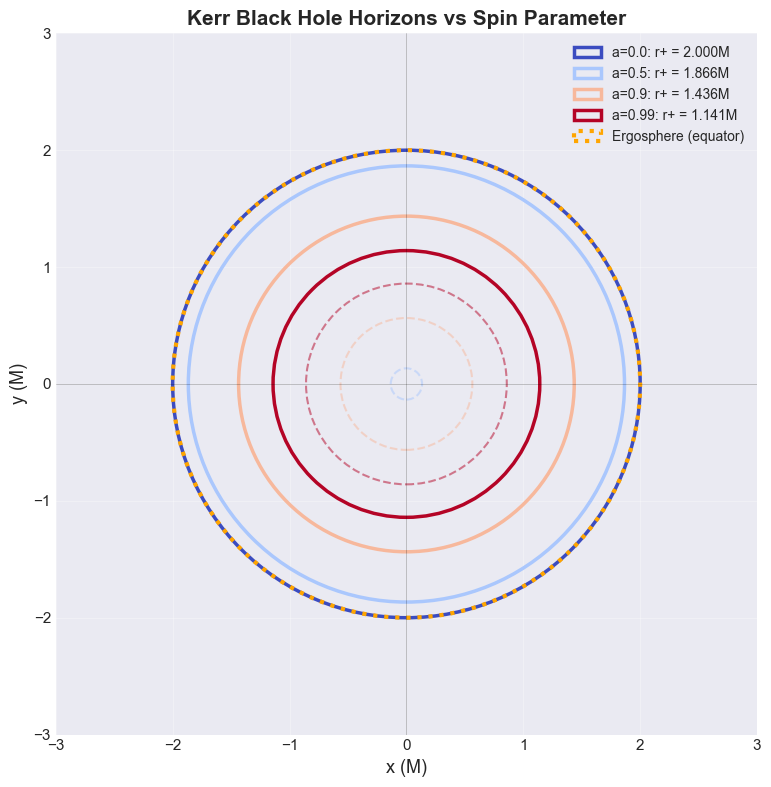

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

spins_plot = [0.0, 0.5, 0.9, 0.99]
colors_spin = plt.cm.coolwarm(np.linspace(0, 1, len(spins_plot)))

for i, spin in enumerate(spins_plot):
    kerr = KerrMetric(mass=1.0, spin=spin)
    
    # Event horizon
    horizon = Circle((0, 0), kerr.r_plus, fill=False, 
                     color=colors_spin[i], linewidth=2.5, 
                     label=f'a={spin}: r+ = {kerr.r_plus:.3f}M')
    ax.add_patch(horizon)
    
    # Inner horizon (dashed)
    if kerr.r_minus > 0.01:
        inner = Circle((0, 0), kerr.r_minus, fill=False, 
                       color=colors_spin[i], linewidth=1.5, 
                       linestyle='--', alpha=0.5)
        ax.add_patch(inner)

# Ergosphere (same for all at equator)
ergo = Circle((0, 0), 2.0, fill=False, color='orange', 
              linewidth=3, linestyle=':', label='Ergosphere (equator)')
ax.add_patch(ergo)

# Schwarzschild radius for reference
schwarzschild_ref = Circle((0, 0), 2.0, fill=False, color='gray', 
                           linewidth=2, linestyle='--', alpha=0.5,
                           label='Schwarzschild r_s')

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.set_xlabel('x (M)', fontsize=13)
ax.set_ylabel('y (M)', fontsize=13)
ax.set_title('Kerr Black Hole Horizons vs Spin Parameter', 
             fontsize=15, fontweight='bold')
ax.legend(loc='upper right', fontsize=10)
ax.axhline(0, color='k', linewidth=0.5, alpha=0.3)
ax.axvline(0, color='k', linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/plots/kerr_horizons.png', dpi=300, bbox_inches='tight')
plt.show()

### Photon Trajectories Around Kerr Black Holes

Now let's simulate photon trajectories around Kerr black holes with different spins.


Simulating photons for a/M = 0.0...
Simulated: r₀=4.00, points: 1503
Simulated: r₀=5.22, points: 1285
Simulated: r₀=6.44, points: 740
Simulated: r₀=7.67, points: 467
Simulated: r₀=8.89, points: 316
Simulated: r₀=10.11, points: 226
Simulated: r₀=11.33, points: 168
Simulated: r₀=12.56, points: 129
Simulated: r₀=13.78, points: 103
Simulated: r₀=15.00, points: 84
Completed simulation for a/M = 0.0

Simulating photons for a/M = 0.5...
Simulated: r₀=4.00, points: 1503
Simulated: r₀=5.22, points: 1292
Simulated: r₀=6.44, points: 742
Simulated: r₀=7.67, points: 468
Simulated: r₀=8.89, points: 317
Simulated: r₀=10.11, points: 226
Simulated: r₀=11.33, points: 168
Simulated: r₀=12.56, points: 129
Simulated: r₀=13.78, points: 103
Simulated: r₀=15.00, points: 83
Completed simulation for a/M = 0.5

Simulating photons for a/M = 0.9...
Simulated: r₀=4.00, points: 1503
Simulated: r₀=5.22, points: 1308
Simulated: r₀=6.44, points: 747
Simulated: r₀=7.67, points: 470
Simulated: r₀=8.89, points: 318
Simul

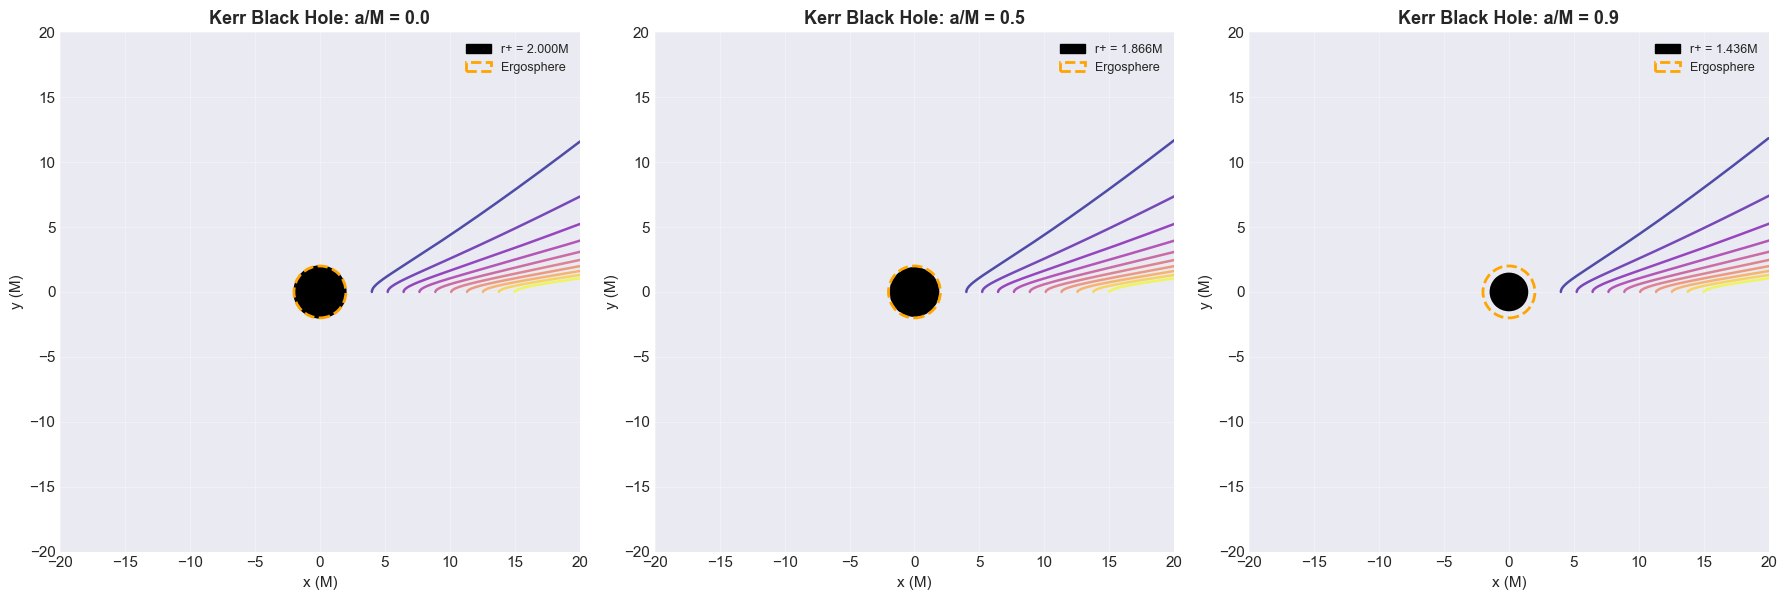

In [ ]:
# Simulate photons around different Kerr black holes
spin_values = [0.0, 0.5, 0.9]
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, spin in enumerate(spin_values):
    ax = axes[idx]
    
    # Create Kerr metric
    kerr = KerrMetric(mass=1.0, spin=spin)
    sim_kerr = GeodesicSimulation(kerr)
    
    print(f"\nSimulating photons for a/M = {spin}...")
    
    # Simulate photon bundle
    r0_values = np.linspace(4, 15, 10)
    sim_kerr.simulate_bundle(
        r0_values,
        v_phi=0.12,
        is_timelike=False,
        tau_span=(0, 150)
    )
    
    # Plot trajectories
    colors = plt.cm.plasma(np.linspace(0, 1, len(sim_kerr.trajectories)))
    for i, traj in enumerate(sim_kerr.trajectories):
        ax.plot(traj.x, traj.y, alpha=0.7, linewidth=1.8, color=colors[i])
    
    # Draw horizon and ergosphere
    horizon = Circle((0, 0), kerr.r_plus, color='black', 
                     label=f'r+ = {kerr.r_plus:.3f}M')
    ax.add_patch(horizon)
    
    ergo = Circle((0, 0), kerr.r_ergo, fill=False, color='orange',
                  linestyle='--', linewidth=2, label='Ergosphere')
    ax.add_patch(ergo)
    
    ax.set_xlim(-20, 20)
    ax.set_ylim(-20, 20)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('x (M)', fontsize=11)
    ax.set_ylabel('y (M)', fontsize=11)
    ax.set_title(f'Kerr Black Hole: a/M = {spin}', fontsize=13, fontweight='bold')
    ax.legend(fontsize=9)
    
    print(f"Completed simulation for a/M = {spin}")

plt.tight_layout()
plt.savefig('../results/plots/kerr_photons_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

### Massive Particles Around Kerr Black Holes

Massive particles follow timelike geodesics. Let's compare their behavior around rotating vs non-rotating black holes.


Simulating massive particles for a/M = 0.0...
Simulated: r₀=5.00, points: 980
Simulated: r₀=6.11, points: 649
Simulated: r₀=7.22, points: 459
Simulated: r₀=8.33, points: 341
Simulated: r₀=9.44, points: 262
Simulated: r₀=10.56, points: 207
Simulated: r₀=11.67, points: 167
Simulated: r₀=12.78, points: 137
Simulated: r₀=13.89, points: 115
Simulated: r₀=15.00, points: 97

Simulating massive particles for a/M = 0.5...
Simulated: r₀=5.00, points: 979
Simulated: r₀=6.11, points: 649
Simulated: r₀=7.22, points: 460
Simulated: r₀=8.33, points: 341
Simulated: r₀=9.44, points: 262
Simulated: r₀=10.56, points: 206
Simulated: r₀=11.67, points: 167
Simulated: r₀=12.78, points: 137
Simulated: r₀=13.89, points: 115
Simulated: r₀=15.00, points: 97

Simulating massive particles for a/M = 0.9...
Simulated: r₀=5.00, points: 978
Simulated: r₀=6.11, points: 649
Simulated: r₀=7.22, points: 459
Simulated: r₀=8.33, points: 341
Simulated: r₀=9.44, points: 262
Simulated: r₀=10.56, points: 206
Simulated: r₀=11.6

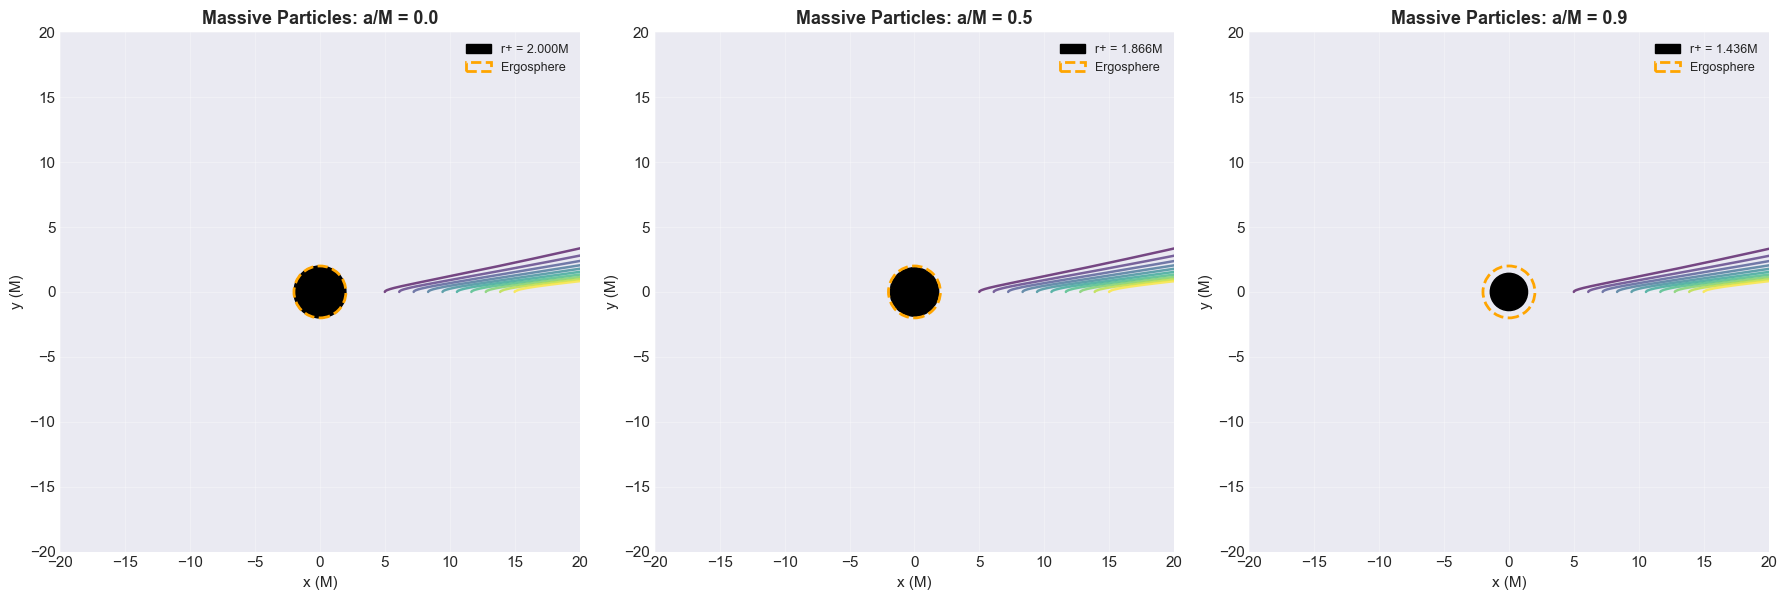

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

spin_values = [0.0, 0.5, 0.9]

for idx, spin in enumerate(spin_values):
    ax = axes[idx]
    
    kerr = KerrMetric(mass=1.0, spin=spin)
    sim_kerr = GeodesicSimulation(kerr)
    
    print(f"\nSimulating massive particles for a/M = {spin}...")
    
    # Simulate with tighter orbits for massive particles
    r0_values = np.linspace(5, 15, 10)
    sim_kerr.simulate_bundle(
        r0_values,
        v_phi=0.08,
        is_timelike=True,
        tau_span=(0, 300)
    )
    
    # Plot
    colors = plt.cm.viridis(np.linspace(0, 1, len(sim_kerr.trajectories)))
    for i, traj in enumerate(sim_kerr.trajectories):
        ax.plot(traj.x, traj.y, alpha=0.7, linewidth=1.8, color=colors[i])
    
    # Draw features
    horizon = Circle((0, 0), kerr.r_plus, color='black',
                     label=f'r+ = {kerr.r_plus:.3f}M')
    ax.add_patch(horizon)
    
    ergo = Circle((0, 0), kerr.r_ergo, fill=False, color='orange',
                  linestyle='--', linewidth=2, label='Ergosphere')
    ax.add_patch(ergo)
    
    ax.set_xlim(-20, 20)
    ax.set_ylim(-20, 20)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('x (M)', fontsize=11)
    ax.set_ylabel('y (M)', fontsize=11)
    ax.set_title(f'Massive Particles: a/M = {spin}', fontsize=13, fontweight='bold')
    ax.legend(fontsize=9)

plt.tight_layout()
plt.savefig('../results/plots/kerr_massive_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

### Frame Dragging Visualization

Let's create a detailed visualization showing the frame-dragging effect near a rapidly rotating black hole.


Simulating prograde orbits (co-rotating)...
Simulated: r₀=3.50, points: 1203
Simulated: r₀=4.71, points: 1204
Simulated: r₀=5.93, points: 748
Simulated: r₀=7.14, points: 455
Simulated: r₀=8.36, points: 300
Simulated: r₀=9.57, points: 210
Simulated: r₀=10.79, points: 154
Simulated: r₀=12.00, points: 118
Simulating retrograde orbits (counter-rotating)...
Simulated: r₀=3.50, points: 1203
Simulated: r₀=4.71, points: 1204
Simulated: r₀=5.93, points: 748
Simulated: r₀=7.14, points: 455
Simulated: r₀=8.36, points: 300
Simulated: r₀=9.57, points: 210
Simulated: r₀=10.79, points: 155
Simulated: r₀=12.00, points: 118


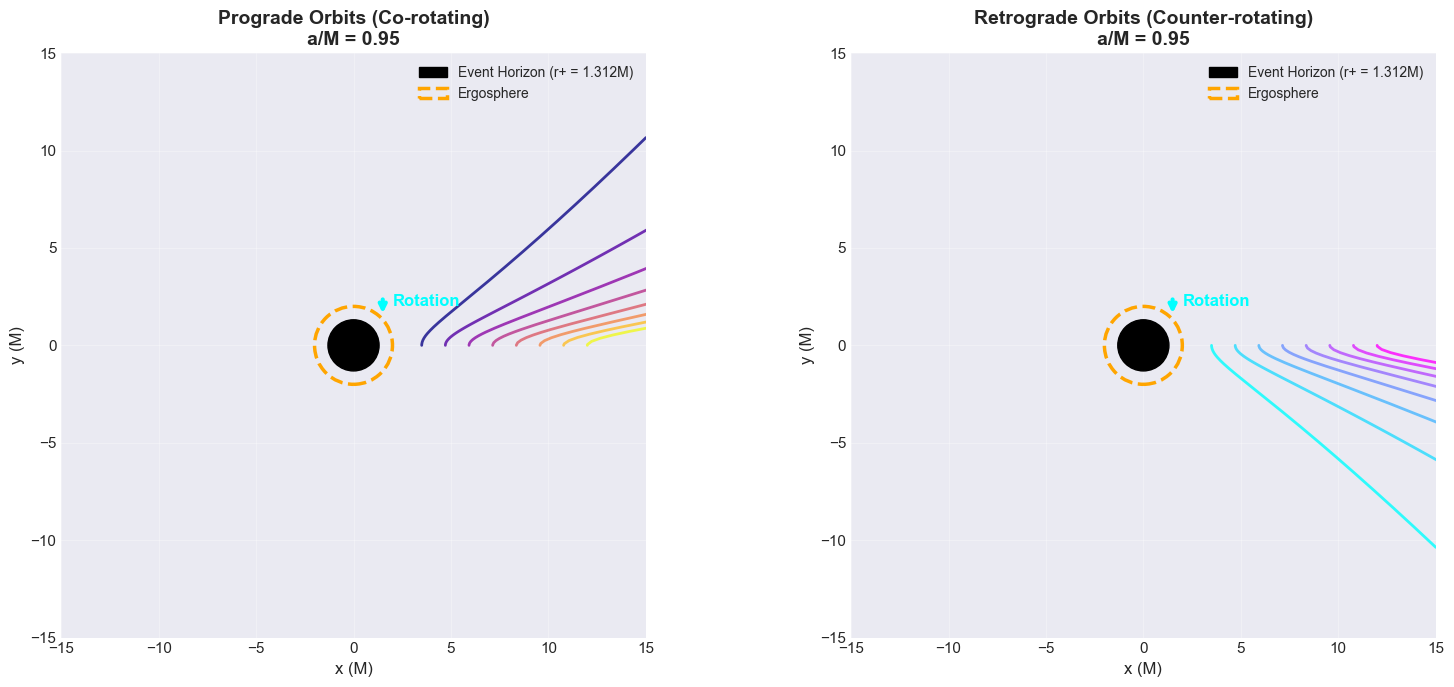


Note: Prograde orbits are more tightly bound due to frame dragging


In [ ]:
# Compare prograde and retrograde orbits
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Use rapidly rotating black hole
kerr_rapid = KerrMetric(mass=1.0, spin=0.95)

# Prograde orbits (co-rotating with black hole)
print("Simulating prograde orbits (co-rotating)...")
sim_prograde = GeodesicSimulation(kerr_rapid)
r0_values = np.linspace(3.5, 12, 8)
sim_prograde.simulate_bundle(r0_values, v_phi=0.15, is_timelike=False, 
                              tau_span=(0, 120))

# Retrograde orbits (counter-rotating)
print("Simulating retrograde orbits (counter-rotating)...")
sim_retrograde = GeodesicSimulation(kerr_rapid)
sim_retrograde.simulate_bundle(r0_values, v_phi=-0.15, is_timelike=False, 
                                tau_span=(0, 120))

# Plot prograde
colors = plt.cm.plasma(np.linspace(0, 1, len(sim_prograde.trajectories)))
for i, traj in enumerate(sim_prograde.trajectories):
    ax1.plot(traj.x, traj.y, alpha=0.8, linewidth=2, color=colors[i])

horizon1 = Circle((0, 0), kerr_rapid.r_plus, color='black', 
                  label=f'Event Horizon (r+ = {kerr_rapid.r_plus:.3f}M)')
ax1.add_patch(horizon1)
ergo1 = Circle((0, 0), kerr_rapid.r_ergo, fill=False, color='orange',
               linestyle='--', linewidth=2.5, label='Ergosphere')
ax1.add_patch(ergo1)

# Add rotation arrow
ax1.annotate('', xy=(1.5, 1.5), xytext=(1.5, 2.5),
            arrowprops=dict(arrowstyle='->', lw=3, color='cyan'))
ax1.text(2, 2, 'Rotation', fontsize=12, color='cyan', fontweight='bold')

ax1.set_xlim(-15, 15)
ax1.set_ylim(-15, 15)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x (M)', fontsize=12)
ax1.set_ylabel('y (M)', fontsize=12)
ax1.set_title(f'Prograde Orbits (Co-rotating)\na/M = {0.95}', 
              fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)

# Plot retrograde
colors = plt.cm.cool(np.linspace(0, 1, len(sim_retrograde.trajectories)))
for i, traj in enumerate(sim_retrograde.trajectories):
    ax2.plot(traj.x, traj.y, alpha=0.8, linewidth=2, color=colors[i])

horizon2 = Circle((0, 0), kerr_rapid.r_plus, color='black',
                  label=f'Event Horizon (r+ = {kerr_rapid.r_plus:.3f}M)')
ax2.add_patch(horizon2)
ergo2 = Circle((0, 0), kerr_rapid.r_ergo, fill=False, color='orange',
               linestyle='--', linewidth=2.5, label='Ergosphere')
ax2.add_patch(ergo2)

# Add rotation arrow
ax2.annotate('', xy=(1.5, 1.5), xytext=(1.5, 2.5),
            arrowprops=dict(arrowstyle='->', lw=3, color='cyan'))
ax2.text(2, 2, 'Rotation', fontsize=12, color='cyan', fontweight='bold')

ax2.set_xlim(-15, 15)
ax2.set_ylim(-15, 15)
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('x (M)', fontsize=12)
ax2.set_ylabel('y (M)', fontsize=12)
ax2.set_title(f'Retrograde Orbits (Counter-rotating)\na/M = {0.95}', 
              fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)

plt.tight_layout()
plt.savefig('../results/plots/frame_dragging.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nNote: Prograde orbits are more tightly bound due to frame dragging")

---
## 4. Animation: Photons in Coordinate Time <a id="animations"></a>

Now let's create animations showing how photons move in coordinate time (what a distant observer sees).

**Note:** These animations take a few minutes to generate.

In [ ]:
def create_animation(sim, metric, video_path, title, n_frames=400):
    """
    Create animation of trajectories in coordinate time.
    
    Parameters:
    -----------
    sim : GeodesicSimulation
        Simulation with computed trajectories
    metric : Metric
        Black hole metric (for drawing horizons)
    video_path : str
        Path to save video
    title : str
        Animation title
    n_frames : int
        Number of animation frames
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Setup plot
    ax.set_xlim(-20, 20)
    ax.set_ylim(-20, 20)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('x (M)', fontsize=12)
    ax.set_ylabel('y (M)', fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')
    
    # Draw horizons
    if isinstance(metric, KerrMetric):
        horizon = Circle((0, 0), metric.r_plus, color='black', 
                        label=f'r+ = {metric.r_plus:.2f}M')
        ergo = Circle((0, 0), metric.r_ergo, fill=False, color='orange',
                     linestyle='--', linewidth=2, label='Ergosphere')
        ax.add_patch(ergo)
    else:
        horizon = Circle((0, 0), metric.r_s, color='black', 
                        label='Event Horizon')
        photon_sphere = Circle((0, 0), metric.r_photon, fill=False,
                              color='orange', linestyle='--', linewidth=2,
                              label='Photon Sphere')
        ax.add_patch(photon_sphere)
    
    ax.add_patch(horizon)
    
    # Time display
    time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes,
                       fontsize=14, verticalalignment='top',
                       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    ax.legend(loc='upper right')
    
    # Initialize lines and particles
    colors = plt.cm.plasma(np.linspace(0, 1, len(sim.trajectories)))
    lines = [ax.plot([], [], alpha=0.5, linewidth=1.5, color=colors[i])[0]
             for i in range(len(sim.trajectories))]
    particles = [ax.plot([], [], 'o', markersize=8, color=colors[i])[0]
                for i in range(len(sim.trajectories))]
    
    # Create common time grid
    t_min = min(traj.t[0] for traj in sim.trajectories)
    t_max = min(traj.t[-1] for traj in sim.trajectories)
    t_grid = np.linspace(t_min, t_max, n_frames)
    
    # Interpolate trajectories
    interpolated_trajs = []
    for traj in sim.trajectories:
        x_interp = np.interp(t_grid, traj.t, traj.x)
        y_interp = np.interp(t_grid, traj.t, traj.y)
        interpolated_trajs.append((x_interp, y_interp))
    
    def init():
        for line, particle in zip(lines, particles):
            line.set_data([], [])
            particle.set_data([], [])
        time_text.set_text('')
        return lines + particles + [time_text]
    
    def update(frame):
        for i, (x_data, y_data) in enumerate(interpolated_trajs):
            lines[i].set_data(x_data[:frame+1], y_data[:frame+1])
            particles[i].set_data([x_data[frame]], [y_data[frame]])
        time_text.set_text(f'Coordinate Time t = {t_grid[frame]:.2f} M')
        return lines + particles + [time_text]
    
    print(f"Creating animation with {n_frames} frames...")
    ani = FuncAnimation(fig, update, frames=n_frames, init_func=init,
                       blit=True, interval=20)
    
    print(f"Saving to {video_path}...")
    ani.save(video_path, writer='ffmpeg', fps=30, dpi=100)
    print(f"Animation saved")
    plt.close(fig)

Simulated: r₀=3.50, points: 74
Simulated: r₀=4.78, points: 81
Simulated: r₀=6.06, points: 83
Simulated: r₀=7.33, points: 84
Simulated: r₀=8.61, points: 85
Simulated: r₀=9.89, points: 85
Simulated: r₀=11.17, points: 86
Simulated: r₀=12.44, points: 86
Simulated: r₀=13.72, points: 86
Simulated: r₀=15.00, points: 87
Creating animation with 400 frames...
Saving to results/videos/schwarzschild_photons.mp4...


KeyboardInterrupt: 

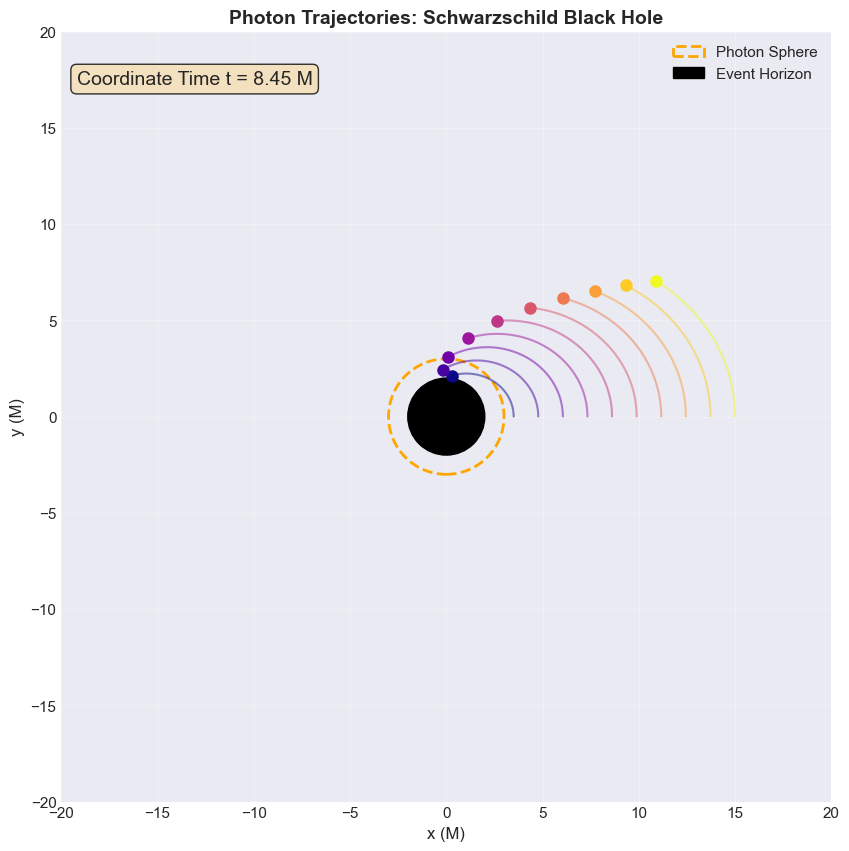

In [ ]:
# Use the photon simulation from earlier
metric_sch = SchwarzschildMetric(mass=1.0)
sim_sch_anim = GeodesicSimulation(metric_sch)

r0_values = np.linspace(3.5, 15, 10)
sim_sch_anim.simulate_bundle(r0_values, v_phi=0.15, is_timelike=False,
                             tau_span=(0, 200))

create_animation(
    sim_sch_anim,
    metric_sch,
    '../results/videos/schwarzschild_photons.mp4',
    'Photon Trajectories: Schwarzschild Black Hole',
    n_frames=400
)

# Display the video
display(Video('../results/videos/schwarzschild_photons.mp4', width=800))

In [ ]:
print("Creating Kerr animation (a/M = 0.9)...")
kerr_anim = KerrMetric(mass=1.0, spin=0.9)
sim_kerr_anim = GeodesicSimulation(kerr_anim)

r0_values = np.linspace(4, 15, 10)
sim_kerr_anim.simulate_bundle(r0_values, v_phi=0.12, is_timelike=False,
                              tau_span=(0, 150))

create_animation(
    sim_kerr_anim,
    kerr_anim,
    '../results/videos/kerr_photons.mp4',
    'Photon Trajectories: Kerr Black Hole (a/M = 0.9)',
    n_frames=400
)

# Display the video
display(Video('../results/videos/kerr_photons.mp4', width=800))

Creating Kerr animation (a/M = 0.9)...
(This may take 2-3 minutes)

Simulated: r₀=4.00, points: 1503
Simulated: r₀=5.22, points: 1308
Simulated: r₀=6.44, points: 747
Simulated: r₀=7.67, points: 470
Simulated: r₀=8.89, points: 318
Simulated: r₀=10.11, points: 226
Simulated: r₀=11.33, points: 168
Simulated: r₀=12.56, points: 130
Simulated: r₀=13.78, points: 103
Simulated: r₀=15.00, points: 84
Creating animation with 400 frames...
Saving to results/videos/kerr_photons.mp4...
✓ Animation saved!


---
## 5. Comparative Analysis <a id="comparison"></a>

Let's analyze the differences between Schwarzschild and Kerr black holes quantitatively.

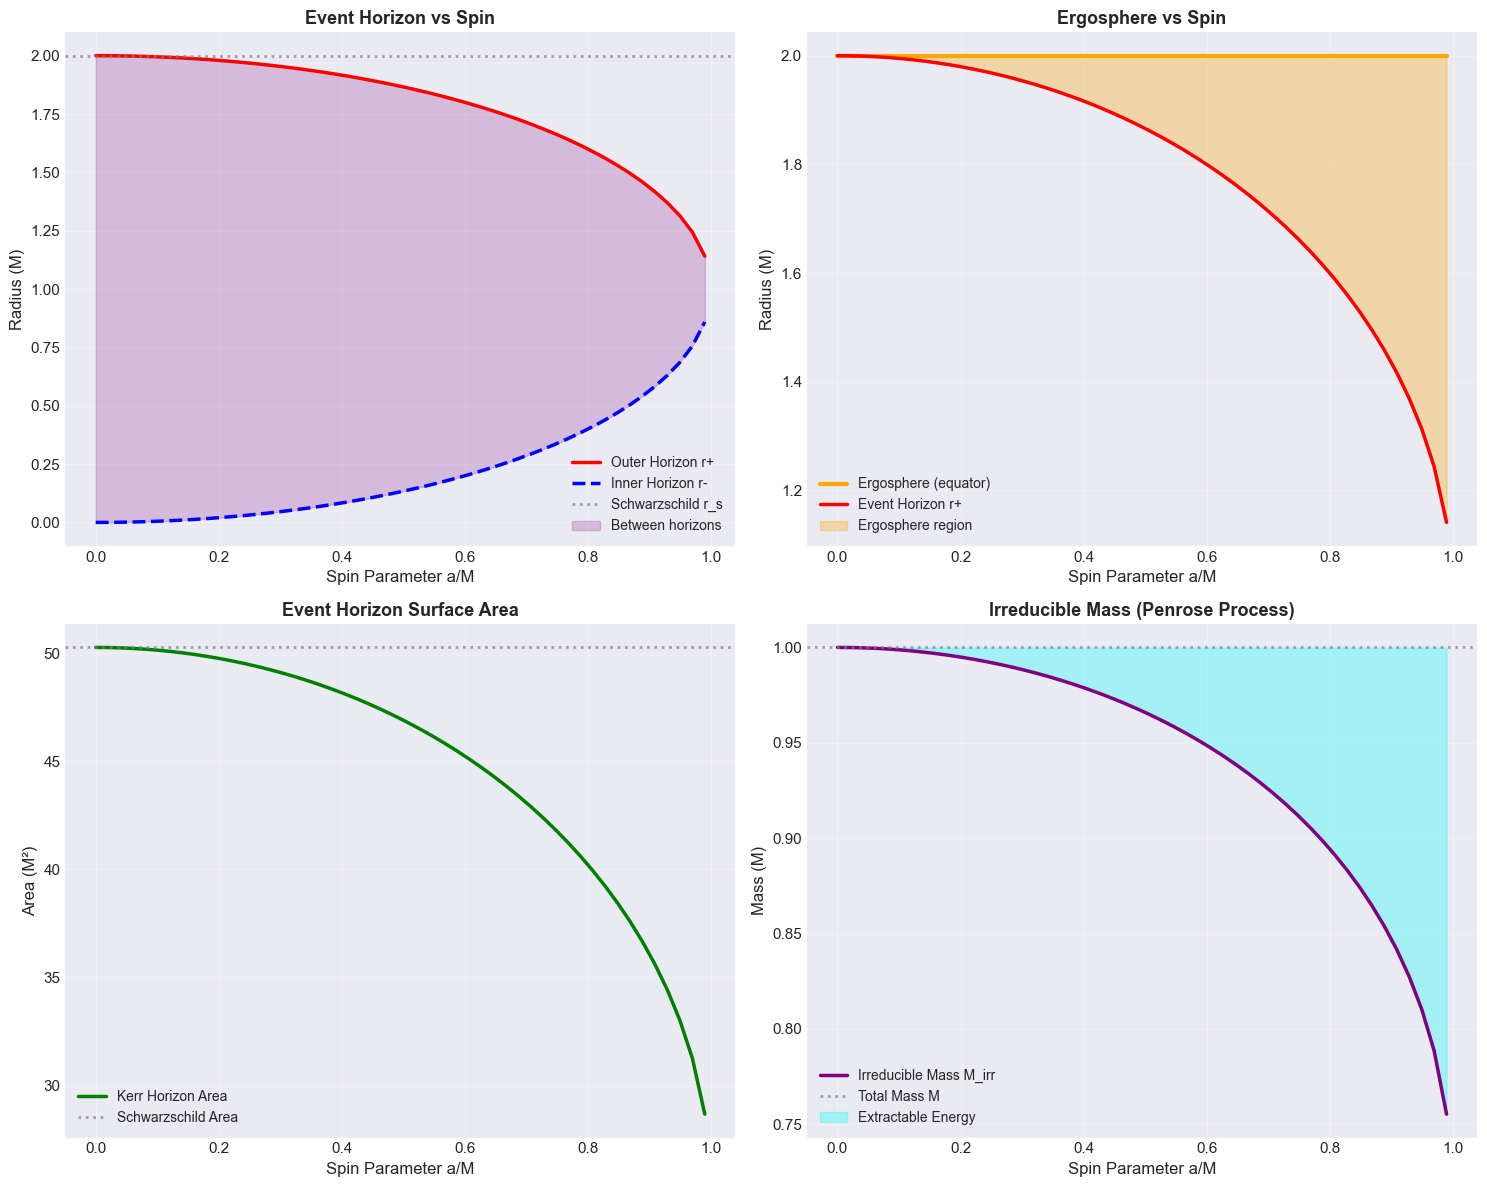

✓ Comparative analysis plots saved


In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Prepare comparison data
spins = np.linspace(0, 0.99, 50)
r_plus_values = []
r_minus_values = []
ergo_values = []

for spin in spins:
    kerr = KerrMetric(mass=1.0, spin=spin)
    r_plus_values.append(kerr.r_plus)
    r_minus_values.append(kerr.r_minus)
    ergo_values.append(kerr.r_ergo)

# Plot 1: Horizon radii vs spin
ax1 = axes[0, 0]
ax1.plot(spins, r_plus_values, 'r-', linewidth=2.5, label='Outer Horizon r+')
ax1.plot(spins, r_minus_values, 'b--', linewidth=2.5, label='Inner Horizon r-')
ax1.axhline(2.0, color='gray', linestyle=':', linewidth=2, 
           label='Schwarzschild r_s', alpha=0.7)
ax1.fill_between(spins, r_minus_values, r_plus_values, alpha=0.2, color='purple',
                label='Between horizons')
ax1.set_xlabel('Spin Parameter a/M', fontsize=12)
ax1.set_ylabel('Radius (M)', fontsize=12)
ax1.set_title('Event Horizon vs Spin', fontsize=13, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot 2: Ergosphere
ax2 = axes[0, 1]
ax2.plot(spins, ergo_values, 'orange', linewidth=3, label='Ergosphere (equator)')
ax2.plot(spins, r_plus_values, 'r-', linewidth=2.5, label='Event Horizon r+')
ax2.fill_between(spins, r_plus_values, ergo_values, alpha=0.3, color='orange',
                label='Ergosphere region')
ax2.set_xlabel('Spin Parameter a/M', fontsize=12)
ax2.set_ylabel('Radius (M)', fontsize=12)
ax2.set_title('Ergosphere vs Spin', fontsize=13, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# Plot 3: Surface area of event horizon
ax3 = axes[1, 0]
area_schwarzschild = 16 * np.pi  # 4πr_s² = 4π(2M)² = 16πM²
areas_kerr = []
for spin in spins:
    kerr = KerrMetric(mass=1.0, spin=spin)
    # A_horizon = 4π(r+² + a²) for Kerr
    area = 4 * np.pi * (kerr.r_plus**2 + kerr.a**2)
    areas_kerr.append(area)

ax3.plot(spins, areas_kerr, 'g-', linewidth=2.5, label='Kerr Horizon Area')
ax3.axhline(area_schwarzschild, color='gray', linestyle=':', linewidth=2,
           label='Schwarzschild Area', alpha=0.7)
ax3.set_xlabel('Spin Parameter a/M', fontsize=12)
ax3.set_ylabel('Area (M²)', fontsize=12)
ax3.set_title('Event Horizon Surface Area', fontsize=13, fontweight='bold')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)

# Plot 4: Angular momentum and irreducible mass
ax4 = axes[1, 1]
M_irr = []  # Irreducible mass: M_irr² = (M² + sqrt(M⁴ - J²/M²))/2
for spin in spins:
    a = spin  # Since M = 1
    m_irr_sq = (1 + np.sqrt(1 - a**2)) / 2
    M_irr.append(np.sqrt(m_irr_sq))

ax4.plot(spins, M_irr, 'purple', linewidth=2.5, label='Irreducible Mass M_irr')
ax4.axhline(1.0, color='gray', linestyle=':', linewidth=2,
           label='Total Mass M', alpha=0.7)
ax4.fill_between(spins, M_irr, 1.0, alpha=0.3, color='cyan',
                label='Extractable Energy')
ax4.set_xlabel('Spin Parameter a/M', fontsize=12)
ax4.set_ylabel('Mass (M)', fontsize=12)
ax4.set_title('Irreducible Mass (Penrose Process)', fontsize=13, fontweight='bold')
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/plots/kerr_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
print("\n" + "="*70)
print("QUANTITATIVE COMPARISON: SCHWARZSCHILD vs KERR")
print("="*70 + "\n")

comparison_spins = [0.0, 0.3, 0.5, 0.7, 0.9, 0.99]

print(f"{'Spin a/M':<10} {'r+':<10} {'r-':<10} {'Ergo':<10} {'Area/16π':<12} {'M_irr/M':<10}")
print("-"*70)

for spin in comparison_spins:
    kerr = KerrMetric(mass=1.0, spin=spin)
    area = 4 * np.pi * (kerr.r_plus**2 + kerr.a**2) / (16 * np.pi)
    m_irr = np.sqrt((1 + np.sqrt(1 - spin**2)) / 2)
    
    print(f"{spin:<10.2f} {kerr.r_plus:<10.4f} {kerr.r_minus:<10.4f} "
          f"{kerr.r_ergo:<10.4f} {area:<12.4f} {m_irr:<10.4f}")

print("\nKey Observations:")
print("  1. Event horizon radius decreases with spin")
print("  2. Inner horizon emerges and grows with spin")
print("  3. Ergosphere remains at 2M at equator for all spins")
print("  4. Horizon area decreases (minimum at extremal a=M)")
print("  5. More rotational energy can be extracted at higher spins")


QUANTITATIVE COMPARISON: SCHWARZSCHILD vs KERR

Spin a/M   r+         r-         Ergo       Area/16π     M_irr/M   
----------------------------------------------------------------------
0.00       2.0000     0.0000     2.0000     1.0000       1.0000    
0.30       1.9539     0.0461     2.0000     0.9770       0.9884    
0.50       1.8660     0.1340     2.0000     0.9330       0.9659    
0.70       1.7141     0.2859     2.0000     0.8571       0.9258    
0.90       1.4359     0.5641     2.0000     0.7179       0.8473    
0.99       1.1411     0.8589     2.0000     0.5705       0.7553    

Key Observations:
  1. Event horizon radius decreases with spin
  2. Inner horizon emerges and grows with spin
  3. Ergosphere remains at 2M at equator for all spins
  4. Horizon area decreases (minimum at extremal a=M)
  5. More rotational energy can be extracted at higher spins


---
## 6. Summary and Physical Insights

### Key Differences: Schwarzschild vs Kerr

| Property | Schwarzschild (a=0) | Kerr (a>0) | Extremal Kerr (a=M) |
|----------|-------------------|-----------|-------------------|
| **Horizons** | One at r = 2M | Two: r± = M ± √(M²-a²) | Degenerate: r+ = r- = M |
| **Symmetry** | Spherical | Axisymmetric | Axisymmetric |
| **Ergosphere** | None | r_ergo > r+ | Maximum extent |
| **Frame Dragging** | None | Present | Maximal |
| **ISCO (prograde)** | 6M | < 6M | M (at horizon!) |
| **ISCO (retrograde)** | 6M | > 6M | 9M |
| **Energy Extraction** | Not possible | Penrose process | Maximum efficiency |

### Physical Phenomena in Kerr Spacetime

1. **Frame Dragging (Lense-Thirring Effect)**
   - Spacetime itself rotates around the black hole
   - Mandatory co-rotation inside ergosphere
   - Causes prograde/retrograde orbit asymmetry

2. **Ergosphere**
   - Region where static observers cannot exist
   - Enables Penrose process for energy extraction
   - Can extract up to 29% of mass-energy for extremal Kerr

3. **Gravitational Lensing**
   - Asymmetric photon trajectories
   - Multiple photon orbits possible at different radii
   - Creates characteristic shadow shape

4. **Astrophysical Relevance**
   - Most astrophysical black holes are rotating (a/M ~ 0.6-0.99)
   - Powers relativistic jets through Blandford-Znajek mechanism
   - Creates accretion disk structure and QPOs

### Numerical Methods

This simulation uses:
- **DOP853**: 8th order Runge-Kutta method (explicit)
- **Adaptive stepping**: Automatically adjusts step size
- **Event detection**: Stops at horizons or escape radius
- **Geodesic constraint**: Ensures g_μν u^μ u^ν = constant

### Future Extensions

Possible improvements to this code:
1. **Full θ dependence** (not just equatorial plane)
2. **Carter constant** formulation for exact Kerr geodesics
3. **Photon capture cross-sections**
4. **ISCO calculations** for massive particles
5. **Ray tracing** for black hole shadows
6. **Gravitational wave orbits**

---
## References

1. Chandrasekhar, S. (1983). *The Mathematical Theory of Black Holes*
2. Misner, Thorne & Wheeler (1973). *Gravitation*
3. Kerr, R. P. (1963). "Gravitational Field of a Spinning Mass"
4. Bardeen, Press & Teukolsky (1972). "Rotating Black Holes"

---

**End of Notebook**

In [ ]:
print("\n" + "="*70)
print("SIMULATION COMPLETE - SUMMARY")
print("="*70)

print("\nGenerated Files:")
print("\nPlots:")
print("  1. ../results/plots/schwarzschild_comparison.png")
print("  2. ../results/plots/kerr_horizons.png")
print("  3. ../results/plots/kerr_photons_comparison.png")
print("  4. ../results/plots/kerr_massive_comparison.png")
print("  5. ../results/plots/frame_dragging.png")
print("  6. ../results/plots/kerr_analysis.png")

print("\nVideos:")
print("  1. ../results/videos/schwarzschild_photons.mp4")
print("  2. ../results/videos/kerr_photons.mp4")

print("\nAll simulations completed successfully!")
print("="*70)


SIMULATION COMPLETE - SUMMARY

Generated Files:

Plots:
  1. results/plots/schwarzschild_comparison.png
  2. results/plots/kerr_horizons.png
  3. results/plots/kerr_photons_comparison.png
  4. results/plots/kerr_massive_comparison.png
  5. results/plots/frame_dragging.png
  6. results/plots/kerr_analysis.png

Videos:
  1. results/videos/schwarzschild_photons.mp4
  2. results/videos/kerr_photons.mp4

All simulations completed successfully!
